In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [3]:
national_names = pd.read_csv('Datasets/NationalNames.csv', delimiter = ',', usecols = [1, 2, 3, 4])
state_names = pd.read_csv('Datasets/StateNames.csv', delimiter = ',', usecols = [1, 2, 3, 4, 5])

In [4]:
natalie = national_names[national_names['Name'] == 'Natalie']
natalie = natalie[natalie['Gender'] == 'F']
bessie = national_names[national_names['Name'] == 'Bessie']
bessie = bessie[bessie['Gender'] == 'F']
natalie.tail()

,Name,Year,Gender,Count
1657605,Natalie,2010,F,8765
1691646,Natalie,2011,F,8626
1725518,Natalie,2012,F,7885
1759206,Natalie,2013,F,7459
1792411,Natalie,2014,F,7061


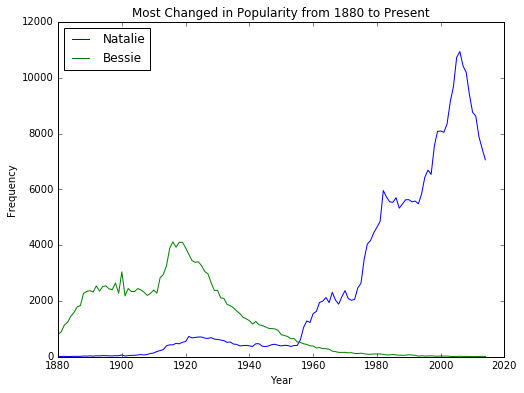

In [12]:
fig = plt.figure(figsize=(8, 6))
ax = plt.axes()

plt.plot(natalie['Year'],natalie['Count'], label='Natalie')
plt.plot(bessie['Year'],bessie['Count'], label = 'Bessie')

plt.title("Most Changed in Popularity from 1880 to Present")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.legend(loc=2)

plt.savefig('nat.png')

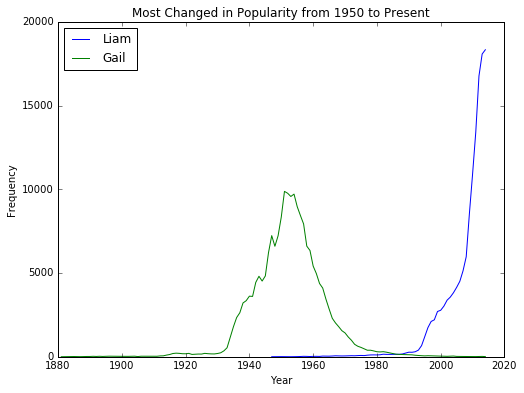

In [13]:
liam = national_names[national_names['Name'] == 'Liam']
liam = liam[liam['Gender'] == 'M']
gail = national_names[national_names['Name'] == 'Gail']
gail = gail[gail['Gender'] == 'F']

fig = plt.figure(figsize=(8, 6))
ax = plt.axes()

plt.plot(liam['Year'],liam['Count'], label='Liam')
plt.plot(gail['Year'],gail['Count'], label = 'Gail')

plt.title("Most Changed in Popularity from 1950 to Present")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.legend(loc=2)

plt.savefig('liam.png')

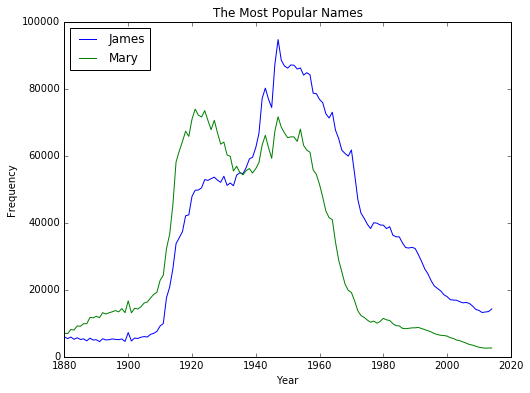

In [14]:
james = national_names[national_names['Name'] == 'James']
james = james[james['Gender'] == 'M']

mary = national_names[national_names['Name'] == 'Mary']
mary = mary[mary['Gender'] == 'F']

fig = plt.figure(figsize=(8, 6))
ax = plt.axes()

plt.plot(james['Year'],james['Count'], label='James')
plt.plot(mary['Year'],mary['Count'], label='Mary')

plt.title("The Most Popular Names")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.legend(loc=2)

plt.savefig('james.png')

In [8]:
# build dictionary of names, values are counts
names_dict = {}
names = national_names.iloc[:,0].values
counts = national_names.iloc[:,-1].values
for i in range(len(national_names.index)):
    if names[i] not in names_dict:
        names_dict[names[i]] = counts[i]
    # or increase count
    else:
        names_dict[names[i]] += counts[i]

# now do some processing on dict to get most pop name
names_list = names_dict.items()

# sort the list
names_list = sorted(names_list, key=lambda x: x[1])

print "Most popular name of all time is", names_list[-1][0], "with", "{:,}".format(names_list[-1][1]), "occurrences"

Most popular name of all time is James with 5,129,096 occurrences


In [9]:
columns = ['Name','Count']
index = range(1,11)
most_pop_10 = pd.DataFrame(index=index, columns=columns)
most_pop_10 = most_pop_10.fillna(0) # with 0s rather than NaNs
for i in range(1,11):
    most_pop_10.ix[i, 'Name'] =  names_list[-i][0]
    most_pop_10.ix[i, 'Count'] =  names_list[-i][1]
    

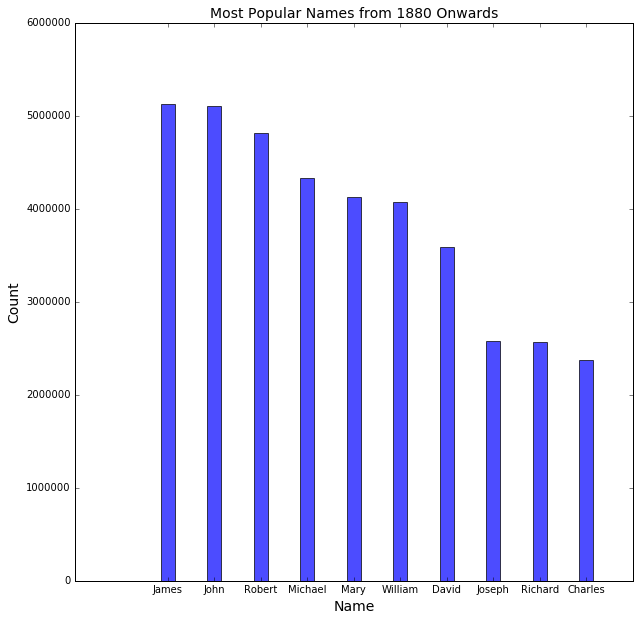

In [26]:
n_groups = 10

fig, ax = plt.subplots(figsize=(10, 10))

index = np.arange(n_groups)
bar_width = 0.30

opacity = 0.7

plt.bar(index, most_pop_10['Count'].values, bar_width,
                 alpha=opacity, align="center")

plt.xlabel('Name', size = '14')
plt.ylabel('Count', size = '14')
plt.title('Most Popular Names from 1880 Onwards', size = '14')
plt.xticks(index, ('James', 'John', 'Robert', 'Michael', 'Mary', 'William', 'David',
                               'Joseph', 'Richard', 'Charles'))

plt.savefig('1880_counts.png')